## Problem Definition
The task here is to predict whether a bank currency note is authentic or not based on four attributes i.e. variance of the image wavelet transformed image, skewness, entropy, and curtosis of the image

The dataset used is from the Kaggle. It uses the pywavelets package to gather variance, skewness, curtosis and entropy of each given banknote image. Each image is binarily classified based on these attributes as either real (class = 1) or fake (class = 0).

About this file
Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

In [1]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
data = pd.read_csv("BankNote_Authentication.csv") # Loading the Data
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Dataset has been loaded & store in a variable "data"

In [3]:
data.shape

(1372, 5)

Got the shape of Dataset , It has 1372 Rows & 5 Columns

In [4]:
data['class'].unique()

array([0, 1], dtype=int64)

Here , "Class" is our target variable & we have printed its values & it has 0 & 1.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

Found the Null values from our Dataset.

As we can see, There is no null values in our Dataset

In [7]:
col_names = data.columns

col_names

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

Get the columns of Dataset 

In [8]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### Lets do some Analysis of Dataset

C:\Users\meabh\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\meabh\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\meabh\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

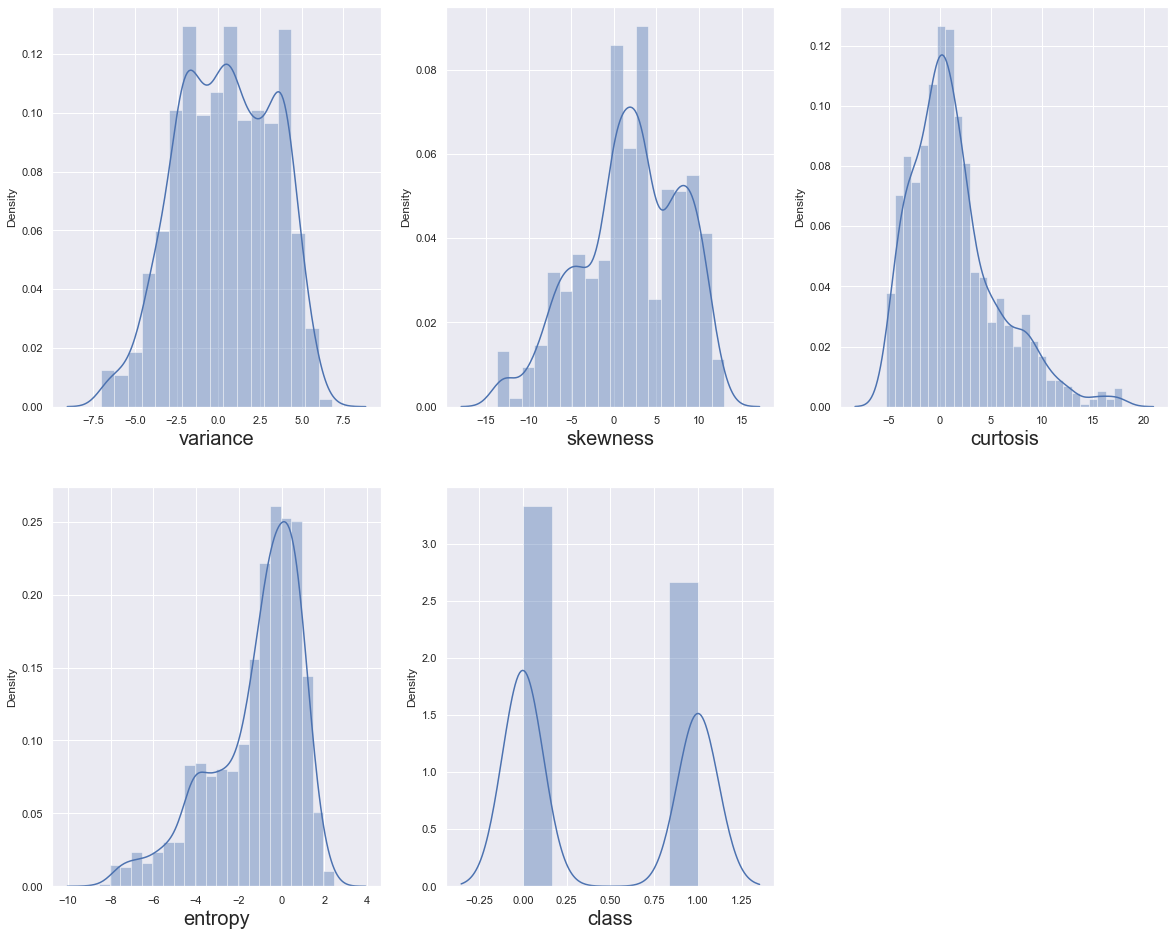

In [9]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

C:\Users\meabh\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='class', ylabel='Density'>

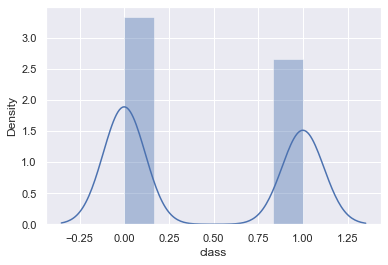

In [10]:
sns.distplot(data["class"])

Text(0, 0.5, 'entropy')

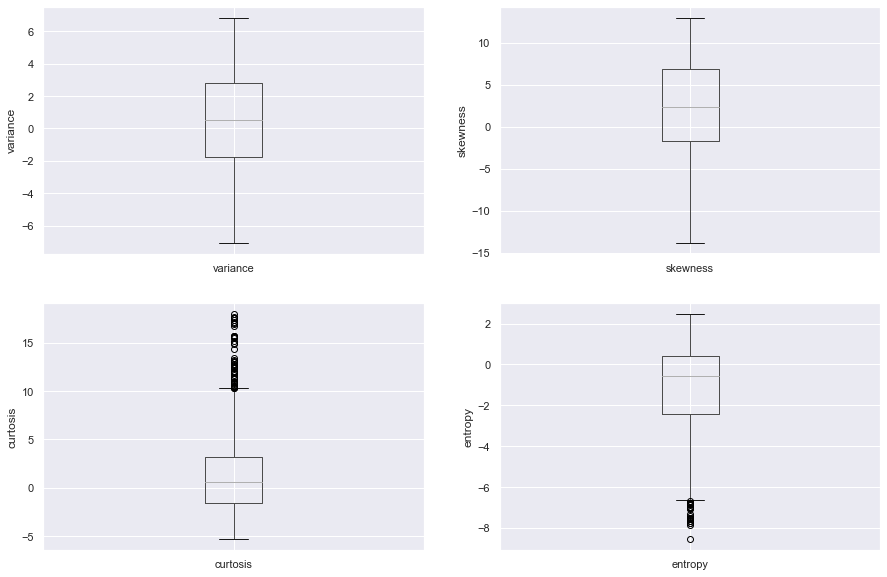

In [11]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = data.boxplot(column='variance')
fig.set_title('')
fig.set_ylabel('variance')


plt.subplot(2, 2, 2)
fig = data.boxplot(column='skewness')
fig.set_title('')
fig.set_ylabel('skewness')


plt.subplot(2, 2, 3)
fig = data.boxplot(column='curtosis')
fig.set_title('')
fig.set_ylabel('curtosis')


plt.subplot(2, 2, 4)
fig = data.boxplot(column='entropy')
fig.set_title('')
fig.set_ylabel('entropy')

From this Boxplot , we can see There is no Outliers are present in "Variance" & "Skewness" columns.

"Curtosis" & "Entropy" have some Outliers

C:\Users\meabh\anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

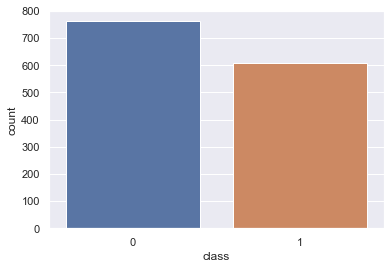

In [12]:
sns.countplot(data['class'])

<AxesSubplot:>

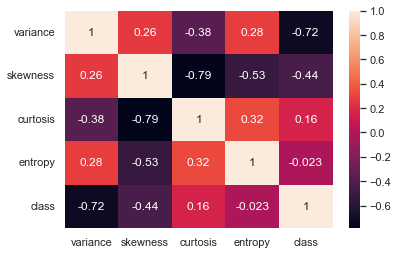

In [13]:
sns.heatmap(data.corr(),annot=True)

Heatmap , to get corellation between variables

### Split the data into dependent and independent feature

In [14]:
X = data.drop(columns = ['class'])      # Independent Variable

y = data['class']                      # Dependent Variable

In [16]:
# we need to scale our data as well

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

### Splt the Dataset into Training & Testing

In [18]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [19]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

### Apply Naive Bayes Algorithm

In [20]:
model.fit(x_train,y_train)

GaussianNB()

In [21]:
y_pred = model.predict(x_test)

In [22]:
print(accuracy_score(y_test, y_pred))

0.8279883381924198


In [23]:
y_pred_train = model.predict(x_train)

y_pred_train

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [24]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(x_test, y_test)))

Training set score: 0.8484
Test set score: 0.8280


We got Training & Testing Accuracy of our Model

In [25]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[172,  29],
       [ 30, 112]], dtype=int64)

In [26]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [27]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8279883381924198

In [28]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.8557213930348259

In [29]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8514851485148515

In [30]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8535980148883374

In [42]:
import pickle as pk     # to save the model

In [43]:
filename = "NBmodel.pkl"

pk.dump(model,open(filename,"wb"))     # wb = write binaries

In [44]:
# loading library
import pickle
# create an iterator object with write permission - model.pkl
with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)